In [1]:
import numpy as np
from math import pi
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [ ]:
import os, json
from scipy.integrate import simpson

In [2]:
N=100
R=1
L=10
Q_pos=10
Q_f=0.1
eps=0.01

In [3]:
def infic(Q, phi, rr):
    return Q/(((np.exp(-phi)*rr**2).sum()-np.exp(-phi[0])*rr[0]**2/2-np.exp(-phi[-1])*rr[-1]**2/2)*dr)/I_d

In [4]:
rr = np.linspace(R, L, N)
dr = (L-R)/N

S_d=4*pi*R**2
I_d=4*pi
sigma_f=Q_f/S_d/eps

phi0=np.ones(N)
C0=Q_pos/(((np.exp(-phi0)*rr**2).sum()-np.exp(-phi0[0])*rr[0]**2/2-np.exp(-phi0[-1])*rr[-1]**2/2)*dr)/I_d

A=sp.diags([-1, 2, -1], [-1, 0, 1], shape=(N, N))/dr**2*eps
B=sp.diags([-np.concatenate(([0], 1/rr[1:-1])), np.concatenate((1/rr[1:-1],[0]))], [1, -1])/dr*eps
A=A.tocsr()
A[ 0, 0] =  eps*2/dr**2
A[ 0, 1] = -eps*2/dr**2
A[-1,-1] =  eps*2/dr**2
A[-1,-2] = -eps*2/dr**2

In [5]:
tol=1e-7
k=0
ep=1
phi=phi0
C=C0
while(ep>tol):
    P=C*(np.exp(-phi)+np.exp(phi))
    F=C*(np.exp(-phi)-np.exp(phi)+(np.exp(-phi)+np.exp(phi))*phi)
    F[0]+=(2/dr-2/R)*sigma_f*eps
    Coeff=A+B+sp.diags(P,0)
    phi_num=sp.linalg.spsolve(Coeff, F)
    ep=np.abs(phi_num-phi).max()
    C=Q_pos/(((np.exp(-phi_num)*rr**2).sum()-np.exp(-phi_num[0])*rr[0]**2/2-np.exp(-phi_num[-1])*rr[-1]**2/2)*dr)/I_d
    phi=phi_num
    k+=1

In [14]:
# import os, json
# os.system("../target/release/possion-boltzmann --low 1.0 --high 10.0 --interval-num 20 > fd.out")
# # Read the output file by line
# with open("fd.out", "r") as f:
#     lines = f.readlines()
# Split the lines into two parts
str1, str2, _ = lines
a = json.loads(str1)
b = json.loads(str2)

In [15]:
a=np.array(a)
b=np.array(b)
bin_range=(0.0, 10.0)
bin_num = 20
bins = np.linspace(bin_range[0], bin_range[1], bin_num+1)
a /= 4*pi/3*(bins[1:]**3 - bins[:-1]**3)
b /= 4*pi/3*(bins[1:]**3 - bins[:-1]**3)

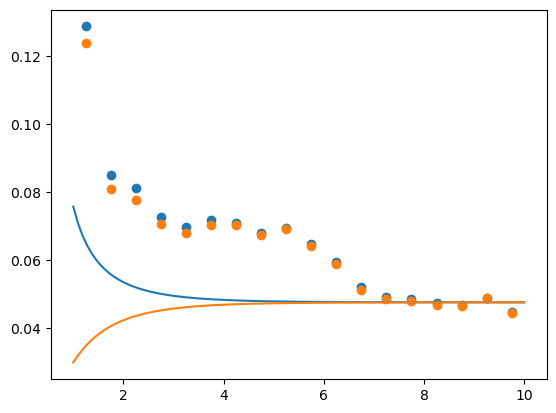

In [16]:
midbin=(bins[:-1]+bins[1:])/2
plt.scatter(midbin[2:],b[2:]*101)
plt.scatter(midbin[2:],a[2:]*100)

A=100
B=21
plt.plot(rr, (np.exp(phi)/B))
plt.plot(rr, (np.exp(-phi)/B))